In [3]:
# initial setup
try:
    # settings colab:
    import google.colab
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

ERROR:root:File `'common/0_notebooks_base_setup.py'` not found.


<h1>Desafio 3 - Grupo 5</h1>

<h3><u>Intregrantes del grupo</u></h3>

- Juan Pablo Ferrari
- Alejandro Jait
- Miriam Lanabere
- Panizza, Camila    

<h3><u>Objetivos</u></h3>
A partir del dataset seleccionado: "Información del Mapa de Oportunidades Comerciales"
nuestro objetivo será determinar cuál es el nivel de riesgo para emprendedores y comerciantes 
a la hora de abrir o potenciar un comercio en la Ciudad Autónoma de Buenos Aires.
Para esto, contaremos con variables como: rubro, zona, información demográfica y facturación.


<h3><u>Índice</u></h3>
<a href='#section_1'>1. Preparación del dataset</a> 

<a href='#section_2'>2. Dataset final</a>  
<a href='#section_3'>3. Modelos implementados</a>  
<a href='#section_4'>4. Modelos + reducción de dimensionalidad</a>  
<a href='#section_5'>5. Modelos + Grid search</a> 

---
---
<b><a id='section_1'><h4>1. Preparación del dataset</h4></a></b>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [15]:
df_zonas = pd.read_csv('Data/zonas.csv', sep=';')
df_comercios = pd.read_csv(Data/COMERCIOS.csv', sep=',')

In [16]:
df_zonas.rename(columns={'MOC_ZONAS_ID':'ID_ZONA'}, inplace=True)

In [17]:
df = df_comercios.join(df_zonas, how='left', on='ID_ZONA', lsuffix='', rsuffix='_df2')

In [18]:
df.drop(columns=['ID_ZONA_df2', 'PK_TIEMPO_ID', 'FECHA', 'PERIODO'], axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12950 entries, 8714 to 26063
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ZONA                                    12950 non-null  object 
 1   RUBRO                                      12950 non-null  object 
 2   NIVEL_RIESGO                               12950 non-null  int64  
 3   APERTURAS                                  12950 non-null  float64
 4   CIERRES                                    12950 non-null  float64
 5   SUPERVIVENCIA                              12950 non-null  float64
 6   PROMEDIO_VENTAS                            12950 non-null  int64  
 7   NIVEL_CRECIMIENTO                          12950 non-null  float64
 8   NIVEL_ESTABILIDAD                          12950 non-null  float64
 9   CANTIDAD_LOCALES                           12950 non-null  int64  
 10  SUPERV_MENOS_1     

None

In [20]:
df.columns.values

array(['ID_ZONA', 'RUBRO', 'NIVEL_RIESGO', 'APERTURAS', 'CIERRES',
       'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'NIVEL_CRECIMIENTO',
       'NIVEL_ESTABILIDAD', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'ANIO_ANTERIOR',
       'PROMEDIO_VENTAS_ANIO_ANTERIOR', 'APERTURAS_ANIO_ANTERIOR',
       'CIERRES_ANIO_ANTERIOR', 'TENDENCIA_APERTURAS',
       'TENDENCIA_CIERRES', 'POBLACION_FLOTANTE', 'POBLACION_VIVIENTE',
       'POBLACION_TRABAJADORA', 'CANTIDAD_HOGARES',
       'PRECIO_PROMEDIO_ALQUILER_LOCAL', 'PRECIO_MAX_ALQUILER_LOCAL',
       'PRECIO_MIN_ALQUILER_LOCAL', 'SUPERFICIE_M2_PROMEDIO_ALQUILER',
       'SUPERFICIE_M2_MAX_ALQUILER', 'SUPERFICIE_M2_MIN_ALQUILER',
       'RUBRO_PREDOMINANTE', 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
       'RUBRO_MENOS_PREDOMINANTE', 'PRECIO_PROMEDIO_VENTA_LOCAL',
       'PRECIO_MAX_VENTA_LOC

In [21]:
df['ID_ZONA'] = df['ID_ZONA'].astype(str)

In [22]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12950 entries, 8714 to 26063
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ZONA                                    12950 non-null  object 
 1   RUBRO                                      12950 non-null  object 
 2   NIVEL_RIESGO                               12950 non-null  int64  
 3   APERTURAS                                  12950 non-null  float64
 4   CIERRES                                    12950 non-null  float64
 5   SUPERVIVENCIA                              12950 non-null  float64
 6   PROMEDIO_VENTAS                            12950 non-null  int64  
 7   NIVEL_CRECIMIENTO                          12950 non-null  float64
 8   NIVEL_ESTABILIDAD                          12950 non-null  float64
 9   CANTIDAD_LOCALES                           12950 non-null  int64  
 10  SUPERV_MENOS_1     

In [24]:
df['NIVEL_RIESGO'].value_counts()

1    4437
2    4240
3    3000
4    1103
5     170
Name: NIVEL_RIESGO, dtype: int64

In [25]:
df.loc[(df.NIVEL_RIESGO == 4) | (df.NIVEL_RIESGO == 5), 'NIVEL_RIESGO'] = 3

In [26]:
df['NIVEL_RIESGO'].value_counts()

1    4437
3    4273
2    4240
Name: NIVEL_RIESGO, dtype: int64

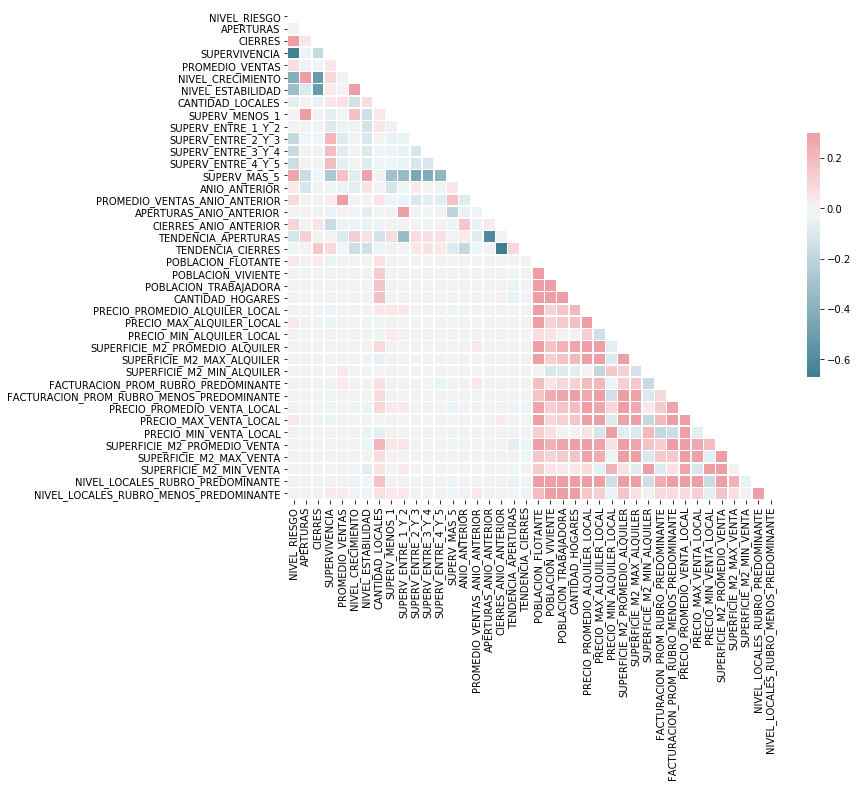

In [27]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

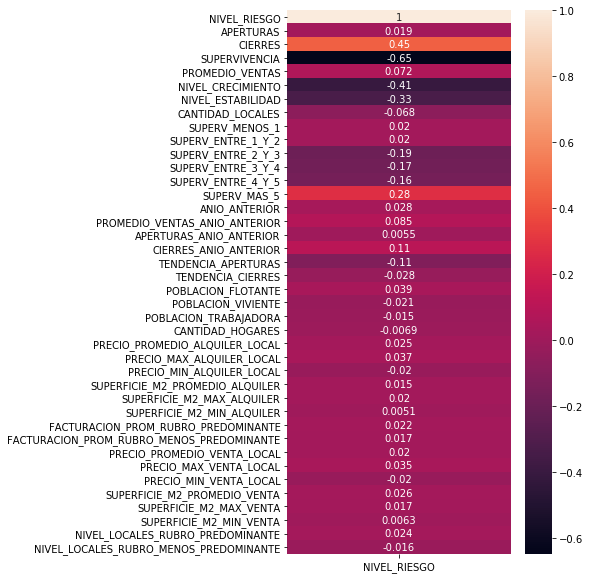

In [28]:
plt.figure(figsize=(5,10))
sns.heatmap(df.corr()[['NIVEL_RIESGO']], annot=True)

In [29]:
df['NR_STR'] = df['NIVEL_RIESGO'].astype(str)

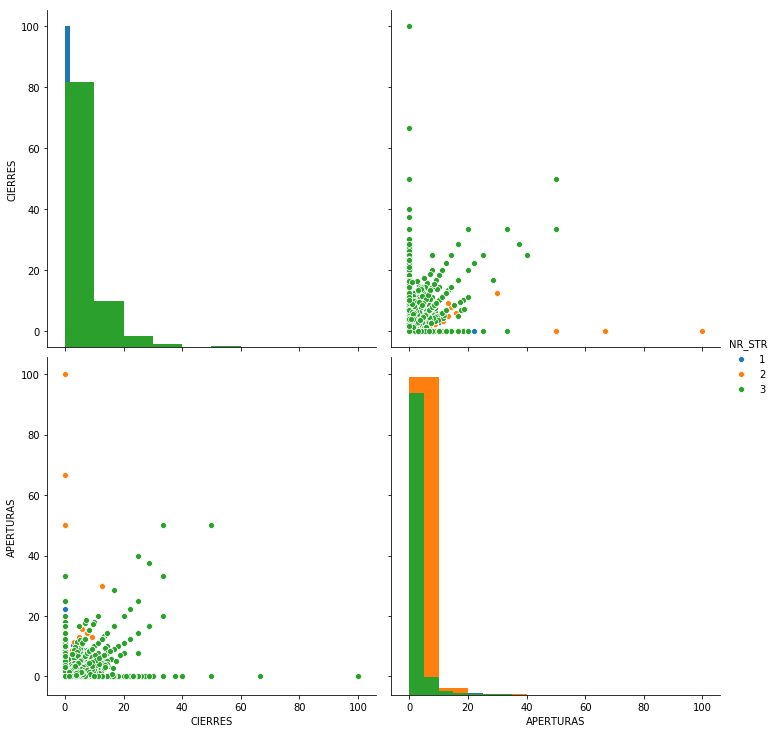

In [30]:
sns.pairplot(data=df[['CIERRES', 'APERTURAS', 'NR_STR']], vars=['CIERRES', 'APERTURAS'], hue='NR_STR', height=5, diag_kind='hist');

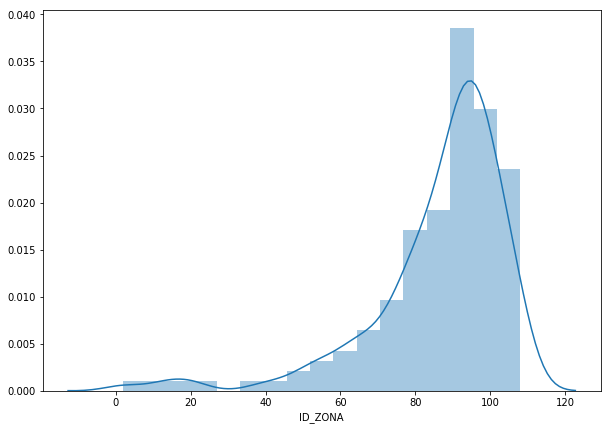

In [31]:
plt.figure(figsize=(10, 7))
sns.distplot(df['ID_ZONA'].value_counts())

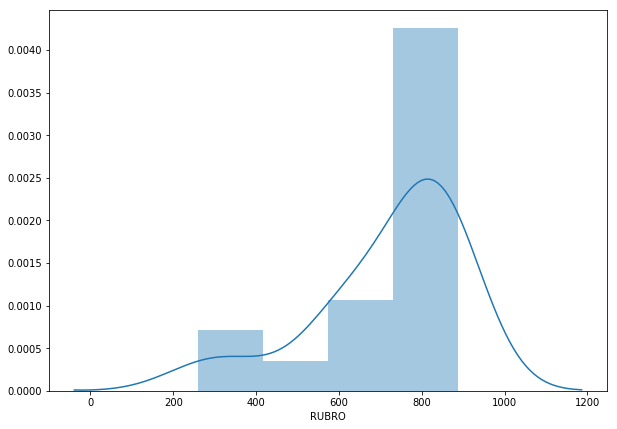

In [32]:
plt.figure(figsize=(10, 7))
sns.distplot(df['RUBRO'].value_counts())

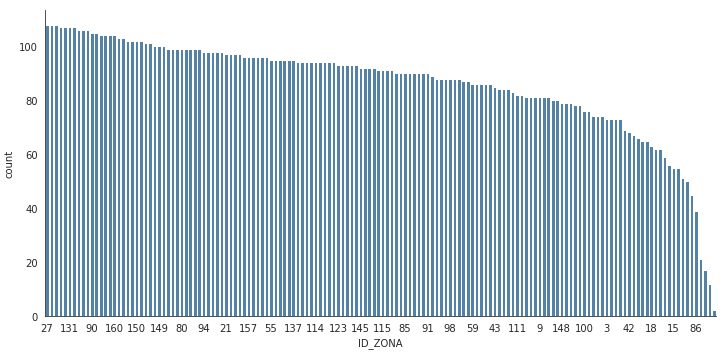

In [33]:
with sns.axes_style('white'):
    g = sns.catplot("ID_ZONA", data=df, aspect=2, kind="count", color='steelblue', order = df['ID_ZONA'].value_counts().index)
    g.set_xticklabels(step=5)

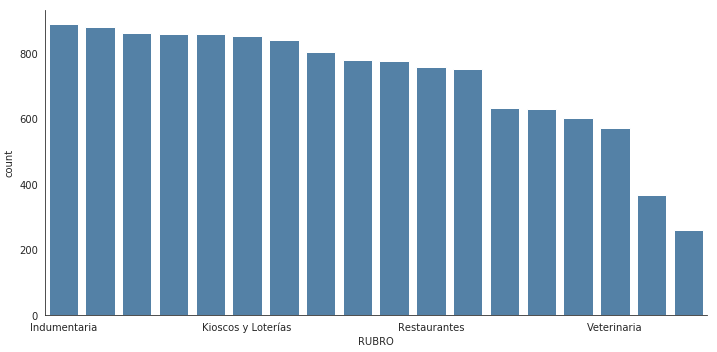

In [34]:
with sns.axes_style('white'):
    g = sns.catplot("RUBRO", data=df, aspect=2, kind="count", color='steelblue', order = df['RUBRO'].value_counts().index)
    g.set_xticklabels(step=5)

---
---
<b><a id='section_2'><h4>2. Dataset final</h4></a></b>

In [35]:
predecir = ['NIVEL_RIESGO']
features = ['ID_ZONA', 'RUBRO', 'APERTURAS', 'CIERRES',
       'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES',
       'POBLACION_FLOTANTE', 'POBLACION_VIVIENTE', 'POBLACION_TRABAJADORA',
       'CANTIDAD_HOGARES', 'PRECIO_PROMEDIO_ALQUILER_LOCAL',
       'PRECIO_MAX_ALQUILER_LOCAL', 'PRECIO_MIN_ALQUILER_LOCAL',
       'SUPERFICIE_M2_PROMEDIO_ALQUILER', 'SUPERFICIE_M2_MAX_ALQUILER',
       'SUPERFICIE_M2_MIN_ALQUILER', 'RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE', 'RUBRO_MENOS_PREDOMINANTE',
       'PRECIO_PROMEDIO_VENTA_LOCAL', 'PRECIO_MAX_VENTA_LOCAL',
       'PRECIO_MIN_VENTA_LOCAL', 'SUPERFICIE_M2_PROMEDIO_VENTA',
       'SUPERFICIE_M2_MAX_VENTA', 'SUPERFICIE_M2_MIN_VENTA',
       'NIVEL_LOCALES_RUBRO_PREDOMINANTE',
       'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE']

In [36]:
# Creamos dummies
df_final = pd.get_dummies(df[features], columns=['ID_ZONA', 
                                                 'RUBRO', 
                                                 'RUBRO_PREDOMINANTE', 
                                                 'RUBRO_MENOS_PREDOMINANTE',
                                                 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
                                                 'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
                                                 'NIVEL_LOCALES_RUBRO_PREDOMINANTE', 
                                                 'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE'], drop_first=True)

In [37]:
X = df_final
y = df[predecir]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [40]:
X_train.shape

(9712, 218)

In [41]:
y_train.shape

(9712, 1)

---
---
<b><a id='section_3'><h4>3. Modelos implementados</h4></a></b>
<a href='#section_3_1'>3.1. Regresión logística</a>  
<a href='#section_3_2'>3.2. KNeighborsClassifier</a>  

<b><a id='section_3_1'>3.1. Regresión logística</a>  </b>

In [42]:
logistic_regression = LogisticRegression(solver='newton-cg')

In [43]:
logistic_regression.fit(X_train_std, y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_test = logistic_regression.predict(X_test_std)

In [45]:
accuracy_score(y_test, y_pred_test)

0.6423718344657195

In [46]:
y_test['NIVEL_RIESGO'].value_counts()

1    1110
3    1068
2    1060
Name: NIVEL_RIESGO, dtype: int64

Text(33,0.5,'Reales')

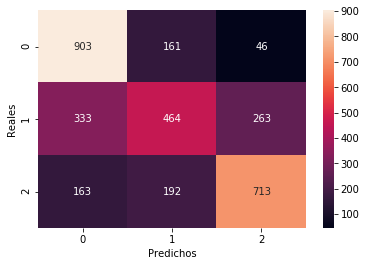

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [48]:
y_pred_proba_logit = logistic_regression.predict_proba(X_test_std)

In [49]:
y_pred_proba_logit.shape

(3238, 3)

In [110]:
# from sklearn.preprocessing import binarize
# y_pred_logit = binarize(y_pred_proba_logit, 0.3)[:,1]

In [111]:
# y_probs_logit_left = y_pred_proba_logit[:,1]
# y_pred_logit = y_probs_logit_left > 0.3

In [113]:
# sns.heatmap(confusion_matrix(y_test, y_pred_logit, ), annot=True, fmt='.0f')
# plt.xlabel('Predichos')
# plt.ylabel('Reales')

<b><a id='section_3_2'>3.2. KNeighborsClassifier</a>  </b>

In [53]:
def scores_knn(X, y, start, stop, step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [54]:
df_scores_1= scores_knn(X_train_std, y_train.values.reshape(-1), 2, 6, 1)

In [55]:
df_scores_1

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.563221,0.002342,2,0.560879,0.565563
1,0.556837,0.001914,3,0.554923,0.558751
2,0.540877,0.003483,4,0.537394,0.544361
3,0.529551,0.002503,5,0.527048,0.532054


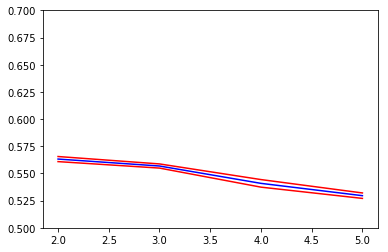

In [56]:
plt.plot(df_scores_1['n_neighbours'], df_scores_1['limite_inferior'], color='r')
plt.plot(df_scores_1['n_neighbours'], df_scores_1['score_medio'], color='b')
plt.plot(df_scores_1['n_neighbours'], df_scores_1['limite_superior'], color='r')
plt.ylim(0.5, 0.7);

In [57]:
df_scores_1.loc[df_scores_1.score_medio == df_scores_1.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.563221,0.002342,2,0.560879,0.565563


In [58]:
best_k_1 = df_scores_1.loc[df_scores_1.score_medio == df_scores_1.score_medio.max(),'n_neighbours'].values[0]
best_k_1

2

In [59]:
model_knn_1 = KNeighborsClassifier(n_neighbors=best_k_1)
model_knn_1.fit(X_train_std, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [60]:
accuracy_score(y_train, model_knn_1.predict(X_train_std))

0.8028212520593081

In [61]:
y_pred_knn_1 = model_knn_1.predict(X_test_std)

In [62]:
accuracy_score(y_test, y_pred_knn_1)

0.592649783817171

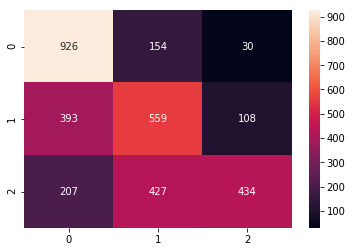

In [63]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_1), annot=True, fmt='.0f')

---
---
<b><a id='section_4'><h4>4. Modelos + reducción de dimensionalidad</h4></a></b>
<a href='#section_4_1'>4.1. PCA + KNClassifier</a>  
<a href='#section_4_2'>4.2. PCA + NaiveBayes</a>  
<a href='#section_4_3'>4.3. PCA + KNRegressor</a>  
<a href='#section_4_4'>4.4. PCA + Regresión logística</a>

<b><a id='section_4_1'>4.1. PCA + KNClassifier</a>  </b>

In [64]:
#Veamos si mejora el score reduciendo dimensionalidad

In [65]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

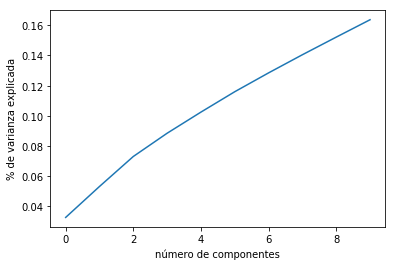

In [66]:
plot_explained_variance(components_count = 10, X = X_train_std)

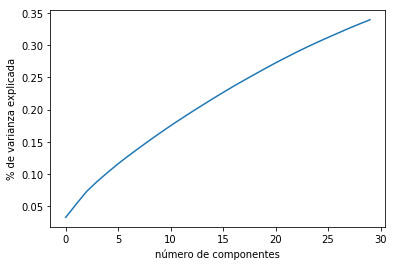

In [67]:
plot_explained_variance(components_count = 30, X = X_train_std)

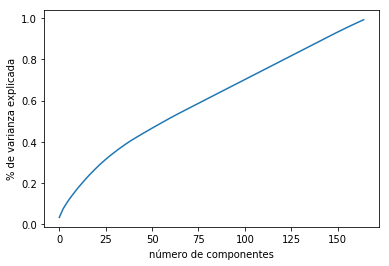

In [68]:
plot_explained_variance(components_count = 165, X = X_train_std)

In [69]:
model_pca = PCA(165).fit(X_train_std)
X_train_PCA = model_pca.transform(X_train_std)
X_test_PCA = model_pca.transform(X_test_std)

In [70]:
df_scores_2 = scores_knn(X_train_PCA, y_train.values.reshape(-1), 2, 6, 1)

In [71]:
df_scores_2

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.563530,0.002104,2,0.561426,0.565634
1,0.555396,0.002897,3,0.552499,0.558292
2,0.530375,0.003975,4,0.526400,0.534350
3,0.513489,0.005322,5,0.508167,0.518812


In [72]:
df_scores_2.loc[df_scores_2.score_medio == df_scores_2.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.56353,0.002104,2,0.561426,0.565634


In [73]:
best_k_2 = df_scores_2.loc[df_scores_2.score_medio == df_scores_2.score_medio.max(),'n_neighbours'].values[0]
best_k_2

2

In [74]:
model_knn_2 = KNeighborsClassifier(n_neighbors=best_k_2)
model_knn_2.fit(X_train_PCA, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [75]:
accuracy_score(y_train, model_knn_2.predict(X_train_PCA))

0.8075576606260296

In [76]:
y_pred_knn_2 = model_knn_2.predict(X_test_PCA)

In [77]:
accuracy_score(y_test, y_pred_knn_2)

0.5957381099444101

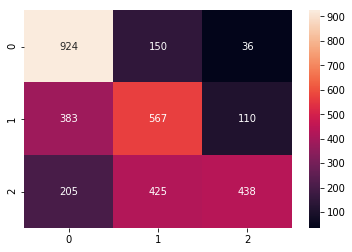

In [78]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_2), annot=True, fmt='.0f')

<b><a id='section_4_2'>4.2. PCA + NaiveBayes</a>  </b>

In [79]:
gnb_1 = GaussianNB()
gnb_1.fit(X_train_std, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
y_pred_nb_train_1 = gnb_1.predict(X_train_std)

In [81]:
accuracy_score(y_train, y_pred_nb_train_1)

0.4251441515650741

In [82]:
y_pred_nb_1 = gnb_1.predict(X_test_std)

In [83]:
accuracy_score(y_test, y_pred_nb_1)

0.3990117356392835

In [84]:
gnb_2 = GaussianNB()
gnb_2.fit(X_train_PCA, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
y_pred_nb_train_2 = gnb_2.predict(X_train_PCA)

In [86]:
accuracy_score(y_train, y_pred_nb_train_2)

0.42915980230642503

In [87]:
y_pred_nb_2 = gnb_2.predict(X_test_PCA)

In [88]:
accuracy_score(y_test, y_pred_nb_2)

0.40889437924644845

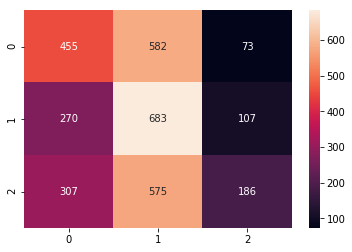

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb_2), annot=True, fmt='.0f')

<b><a id='section_4_3'>4.3. PCA + KNRegressor</a>  </b>

In [90]:
# instanciamos el modelo
knn_regressor = KNeighborsRegressor()

In [91]:
# armamos los parámetros para GridSearchCV
k_range = list(range(1, 5))
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4], 'weights': ['uniform', 'distance']}


In [92]:
# importamos e instanciamos el GridSearchCV
folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(knn_regressor, param_grid, cv=folds)

In [93]:
# entrenamos el modelo
grid.fit(X_train_PCA, y_train.values.reshape(-1))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
display(grid.best_estimator_, grid.best_score_, grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='distance')

0.3511511478444199

{'n_neighbors': 4, 'weights': 'distance'}

In [95]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

y_pred_grid = grid.predict(X_test_PCA)

print('r2 = {}'.format(r2_score(y_test, y_pred_grid)))
print('MAE = {}'.format(mean_absolute_error(y_test, y_pred_grid)))
print('RMSD = {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_grid))))

r2 = 0.36788624251579893
MAE = 0.4412225245608257
RMSD = 0.6519793117724911


In [96]:
y_pred_grid

array([1.        , 3.        , 2.52312362, ..., 3.        , 1.        ,
       1.        ])

<b><a id='section_4_4'>4.4. PCA + Regresión logística</a>  </b>

In [97]:
logistic_regression_2 = LogisticRegression(solver='newton-cg')

In [98]:
logistic_regression_2.fit(X_train_PCA, y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred_test_2 = logistic_regression_2.predict(X_test_PCA)

In [100]:
accuracy_score(y_test, y_pred_test_2)

0.6167387276096356

---
---
<b><a id='section_5'><h4>5. Modelos + Grid search</h4></a></b>

In [101]:
# penalty L1: Lasso y L2: Ridge
params_2 = [
    {'C': [1, 10, 100, 1000, 2000],
     'penalty': ['l1', 'l2',],
     'solver': ['newton-cg']}
]

grid_2 = GridSearchCV(LogisticRegression(), param_grid=params_2[0], cv=folds, n_jobs=2)
grid_2.fit(X_train_std, y_train.values.reshape(-1))
display(grid_2.best_estimator_, grid_2.best_score_, grid_2.best_params_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.6279852203876388

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [102]:
y_pred_grid_2 = grid_2.predict(X_test_std)

In [103]:
print (classification_report(y_test, y_pred_grid_2))

              precision    recall  f1-score   support

           1       0.65      0.81      0.72      1110
           2       0.57      0.44      0.49      1060
           3       0.70      0.67      0.68      1068

    accuracy                           0.64      3238
   macro avg       0.64      0.64      0.63      3238
weighted avg       0.64      0.64      0.63      3238



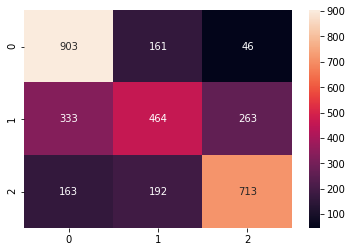

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_2), annot=True, fmt='.0f')